# 4.10 Task Part 1

In [ ]:
#Contents list
#Clean data
#Remove PII
#Create column 'region'
#Show difference in spending by 'region'
#Create column 'activity_level'
#Create 'high_activity' dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
ords_prods_cust_merge = pd.read_pickle(r"C:\Users\User\Documents\07-2022 Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_merged.pkl")

In [3]:
#Clean data to minimize data usage
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   First Name              object  
 2   Surname                 object  
 3   Gender                  object  
 4   State                   object  
 5   Age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   Income                  int64   
 10  Unnamed: 0              int64   
 11  product_id              int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  order_id                int64   
 17  eval_set                object  
 18  order_number            int64   
 19  order_dow               int64   
 20  order_hour_of_day       int64   
 21  days_s

In [4]:
ords_prods_cust_merge['Age'] = ords_prods_cust_merge['Age'].astype('int8')

In [5]:
ords_prods_cust_merge['user_id'] = ords_prods_cust_merge['user_id'].astype('int16')

In [6]:
ords_prods_cust_merge['n_dependants'] = ords_prods_cust_merge['n_dependants'].astype('int8')

In [7]:
ords_prods_cust_merge['Income'] = ords_prods_cust_merge['Income'].astype('int16')

In [8]:
ords_prods_cust_merge['product_id'] = ords_prods_cust_merge['product_id'].astype('int16')

In [9]:
ords_prods_cust_merge['aisle_id'] = ords_prods_cust_merge['aisle_id'].astype('int8')

In [10]:
ords_prods_cust_merge['department_id'] = ords_prods_cust_merge['department_id'].astype('int8')

In [11]:
ords_prods_cust_merge['order_dow'] = ords_prods_cust_merge['order_dow'].astype('int8')

In [12]:
ords_prods_cust_merge['order_hour_of_day'] = ords_prods_cust_merge['order_hour_of_day'].astype('int8')

In [13]:
ords_prods_cust_merge['order_id'] = ords_prods_cust_merge['order_id'].astype('int16')

In [14]:
ords_prods_cust_merge['order_number'] = ords_prods_cust_merge['order_number'].astype('int16')

In [15]:
ords_prods_cust_merge['max_order'] = ords_prods_cust_merge['max_order'].astype('int8')

In [16]:
ords_prods_cust_merge['add_to_cart_order'] = ords_prods_cust_merge['add_to_cart_order'].astype('int8')

In [17]:
ords_prods_cust_merge['prices'] = ords_prods_cust_merge['prices'].astype('float16')

In [18]:
ords_prods_cust_merge['days_since_prior_order'] = ords_prods_cust_merge['days_since_prior_order'].astype('float16')

In [19]:
ords_prods_cust_merge['avg_price'] = ords_prods_cust_merge['avg_price'].astype('float16')

In [20]:
ords_prods_cust_merge['med_freq'] = ords_prods_cust_merge['med_freq'].astype('float16')

In [21]:
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int16   
 1   First Name              object  
 2   Surname                 object  
 3   Gender                  object  
 4   State                   object  
 5   Age                     int8    
 6   date_joined             object  
 7   n_dependants            int8    
 8   fam_status              object  
 9   Income                  int16   
 10  Unnamed: 0              int64   
 11  product_id              int16   
 12  product_name            object  
 13  aisle_id                int8    
 14  department_id           int8    
 15  prices                  float16 
 16  order_id                int16   
 17  eval_set                object  
 18  order_number            int16   
 19  order_dow               int8    
 20  order_hour_of_day       int8    
 21  days_s

In [22]:
ords_prods_cust_merge = ords_prods_cust_merge.drop(columns = ['reordered', 'Unnamed: 0','_merge'])

In [23]:
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int16  
 1   First Name              object 
 2   Surname                 object 
 3   Gender                  object 
 4   State                   object 
 5   Age                     int8   
 6   date_joined             object 
 7   n_dependants            int8   
 8   fam_status              object 
 9   Income                  int16  
 10  product_id              int16  
 11  product_name            object 
 12  aisle_id                int8   
 13  department_id           int8   
 14  prices                  float16
 15  order_id                int16  
 16  eval_set                object 
 17  order_number            int16  
 18  order_dow               int8   
 19  order_hour_of_day       int8   
 20  days_since_prior_order  float16
 21  add_to_cart_order       int8 

In [24]:
# View columns for any potential PII
for col in ords_prods_cust_merge:
    print(col)

user_id
First Name
Surname
Gender
State
Age
date_joined
n_dependants
fam_status
Income
product_id
product_name
aisle_id
department_id
prices
order_id
eval_set
order_number
order_dow
order_hour_of_day
days_since_prior_order
add_to_cart_order
busiest_day
busiest_days
busiest_period_of_day
max_order
loyalty_flag
avg_price
spending_flag
med_freq
freq_flag


In [25]:
# Drop PII
ords_prods_cust_merge_no_PII = ords_prods_cust_merge.drop(columns = ['First Name', 'Surname'])

In [26]:
# View data without PII
ords_prods_cust_merge_no_PII.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,Income,product_id,product_name,...,add_to_cart_order,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_freq,freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,2,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,1,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,2,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,1,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,2,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer


In [27]:
# Define function to create region data
def region(row):

  if row['State'] == 'Maine' or row['State'] == 'New Hampshire' or row['State'] == 'Vermont' or row['State'] == 'Massachusets' or row['State'] == 'Rhose Island' or row['State'] == 'Connecticut' or row['State'] == 'New York' or row['State'] == 'Pennsylvania':
    return 'Northeast'
  elif row['State'] == 'Wisconsin' or row['State'] == 'Michigan' or row['State'] == 'Illinois' or row['State'] == 'Indiana' or row['State'] == 'Ohio' or row['State'] == 'North Dakota' or row['State'] == 'South Dakota' or row['State'] == 'Nebraska' or row['State'] == 'Kansas' or row['State'] == 'Minnesota' or row['State'] == 'Iowa' or row['State'] == 'Missouri':
    return 'Midwest'
  elif row['State'] == 'Delaware' or row['State'] == 'Maryland' or row['State'] == 'District of Columbia' or row['State'] == 'Virginia' or row['State'] == 'West Virginia' or row['State'] == 'North Carolina' or row['State'] == 'South Carolina' or row['State'] == 'Georgia' or row['State'] == 'Florida' or row['State'] == 'Kentucky' or row['State'] == 'Tennessee' or row['State'] == 'Mississippi' or row['State'] == 'Alabama' or row['State'] == 'Oklahoma' or row['State'] == 'Texas' or row['State'] == 'Arkansas' or row['State'] == 'Louisiana':
    return 'South'
  elif row['State'] =='Idaho' or row['State'] == 'Montana' or row['State'] == 'Wyoming' or row['State'] == 'Nevada' or row['State'] == 'Utah' or row['State'] == 'Colorado' or row['State'] == 'Arizona' or row['State'] == 'New Mexico' or row['State'] == 'Alaska' or row['State'] == 'Washington' or row['State'] == 'Oregon' or row['State'] == 'California' or row['State'] == 'Hawaii':
    return 'West'
  else: return 'Not enough data'

In [28]:
# Use function to create column
ords_prods_cust_merge_no_PII['region'] = ords_prods_cust_merge_no_PII.apply(region, axis=1)


In [29]:
# View new column
ords_prods_cust_merge_no_PII.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,Income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_freq,freq_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest


<AxesSubplot:>

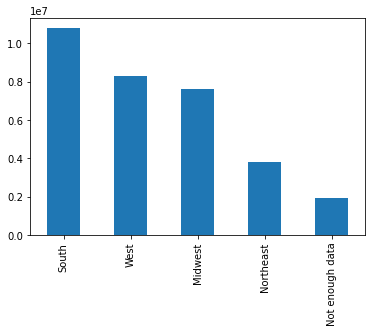

In [30]:
# Show difference in spending by region
ords_prods_cust_merge_no_PII['region'].value_counts().plot.bar()

In [31]:
ords_prods_cust_merge_no_PII.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,Income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_freq,freq_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest


In [32]:
# Define function to create revenue flag
def activity_flag(row):

   if row['max_order'] < 5:
    return 'Low-activity customer'
   elif row['max_order'] >= 5:
    return 'High-activity customer'
   else: return 'Not enough data'

In [33]:
# Use function to create column
ords_prods_cust_merge_no_PII['activity_level'] = ords_prods_cust_merge_no_PII.apply(activity_flag, axis=1)

In [34]:
# View new column
ords_prods_cust_merge_no_PII.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,Income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_freq,freq_flag,region,activity_level
0,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer


In [35]:
# Create high activity dataframe
ords_prods_cust_merge_high_activity = ords_prods_cust_merge_no_PII[ords_prods_cust_merge_no_PII['activity_level']=='High-activity customer']

In [36]:
# View new dataframe
ords_prods_cust_merge_high_activity.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,Income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_freq,freq_flag,region,activity_level
0,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,-30943,196,Soda,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,-30943,6184,Clementines,...,Busiest days,Fewest orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High-activity customer


In [37]:
# Create path
path = r'C:\Users\User\Documents\07-2022 Instacart Basket Analysis'

In [38]:
# Export data
ords_prods_cust_merge_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_high_activity.pkl'))

In [39]:
# Export data
ords_prods_cust_merge_no_PII.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge_no_PII.pkl'))